# <u> **Overview**

CIFAR - 10 is a widely used dataset that consists of several images diveded into the following ten classes

*   Airplanes, Car, Birds, Cats, Deer, Dogs, Frogs, Horses, Ships, Trucks

The dataset consists of 60,000 32x32 color images, 6000 images of each class

Link to dataset - https://www.cs.toronto.edu/~kriz/cifar.html 

The objective of this project is to train a deep learning model classifier that can correctly classify these images

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import dataset
from keras.datasets import cifar10

In [ ]:
#Create test and train
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

# <u>**Data Visualization**

[5]


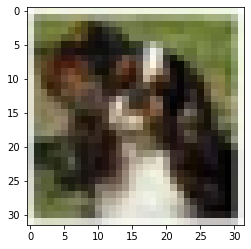

In [ ]:
#Show random image
i = 500
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


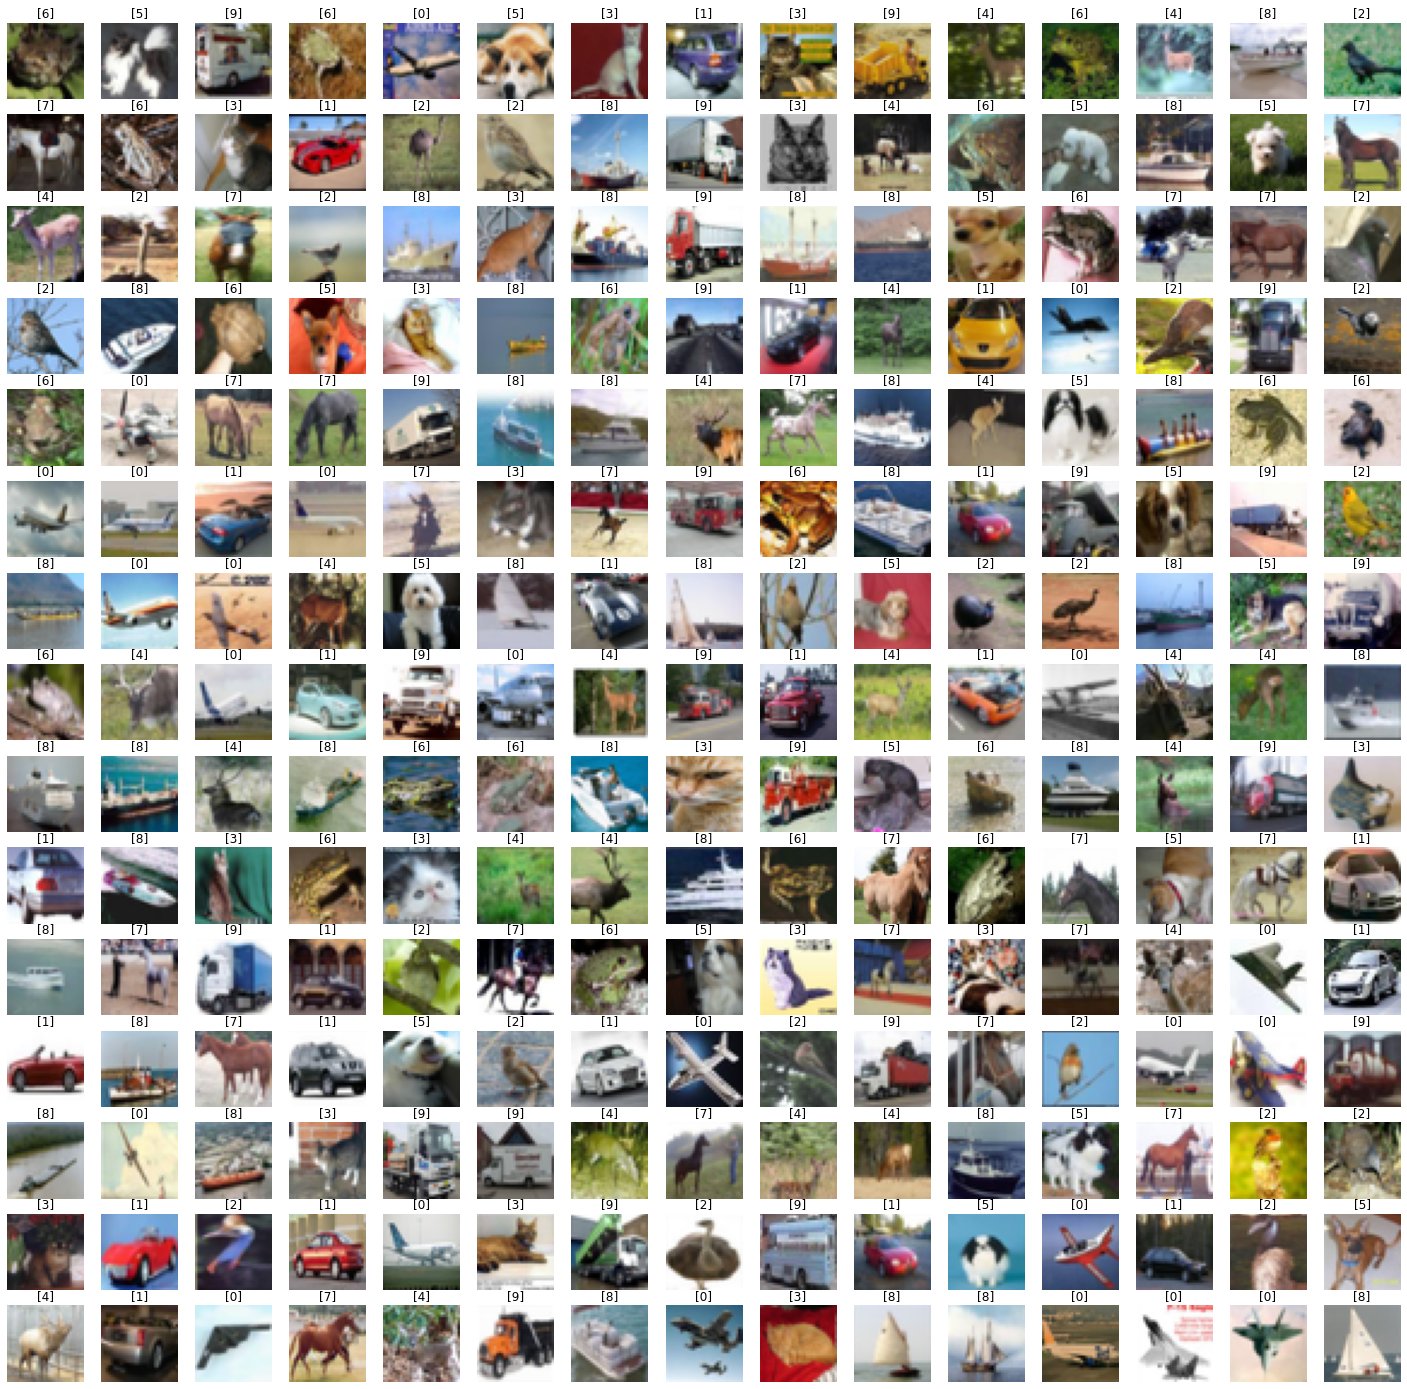

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index  = np.random.randint(0, n_training) #choose random index to show each team
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #Set image title to image label
    axes[i].axis('off')  #remove axes labels

# <u>**Data Preparation**

In [ ]:
# convert images to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
number_cat = 10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
#Convert y_train to binary format
y_train = keras.utils.np_utils.to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Same for y_test
y_test = keras.utils.np_utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [ ]:
# Normalization X_train and X_test
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Check 
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
Input_shape

(32, 32, 3)

# <u>**Model Training**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

In [ ]:
# instantiate object from sequential
cnn_model = Sequential()
# Create first convolutional layer
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape ))
# Create second convolutional layer (no need for input shape to be specified)
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
# Add MaxPooling layer
cnn_model.add(MaxPooling2D(2,2))
# Add dropout
cnn_model.add(Dropout(0.3))

#Adding more depth to mode
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

#Flattening
cnn_model.add(Flatten())

# Add Fully Connected ANN (hidden layers)
cnn_model.add(Dense(units = 512, activation='relu'))
cnn_model.add(Dense(units = 512, activation='relu'))

# Build Ouput layer (softmax activation for output layer classification)
cnn_model.add(Dense(units = 10, activation ='softmax'))

In [ ]:
#Compile model before fitting training data
cnn_model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# fit to training data (only 2 epochs to save time and computation)
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 186s 118ms/step - loss: 1.5744 - accuracy: 0.4305
Epoch 2/2
1563/1563 [==============================] - 184s 118ms/step - loss: 1.1414 - accuracy: 0.6016


# <u>**Model Evaluation**

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 0.9904 - accuracy: 0.6540


In [ ]:
# Generate predicitions of classes by feeding test data into model
y_pred = np.argmax(cnn_model.predict(X_test),axis=1)
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
#Need to Compare to actal classes in y test set
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
# Need to convert y test back to original format
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

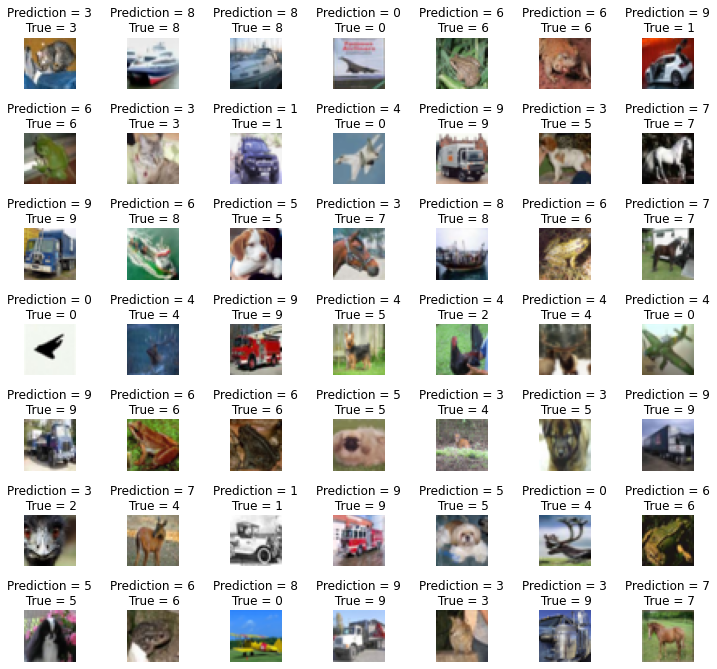

In [ ]:
# Plot image, prediction class, and true class for visual evaluation
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  

In [ ]:
# Confusion Matrix to summarize results
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm  = confusion_matrix(y_test, y_pred)
cm

array([[536,  30,  37,  35,  62,   3,   5,  18, 176,  98],
       [  4, 821,   1,  14,   2,   1,   3,   3,  25, 126],
       [ 52,   9, 361, 175, 154,  77,  63,  50,  40,  19],
       [ 17,  12,  15, 603,  76, 124,  40,  41,  23,  49],
       [ 11,   4,  30, 122, 666,  26,  39,  76,  20,   6],
       [  6,   0,  14, 350,  55, 465,   9,  69,  15,  17],
       [  5,   4,  23, 166,  55,  30, 682,  12,  11,  12],
       [  8,   2,  11,  78,  83,  55,   2, 724,   4,  33],
       [ 31,  34,   4,  26,  18,   4,   7,   4, 834,  38],
       [  9,  65,   2,  14,   9,   4,   6,  13,  30, 848]])

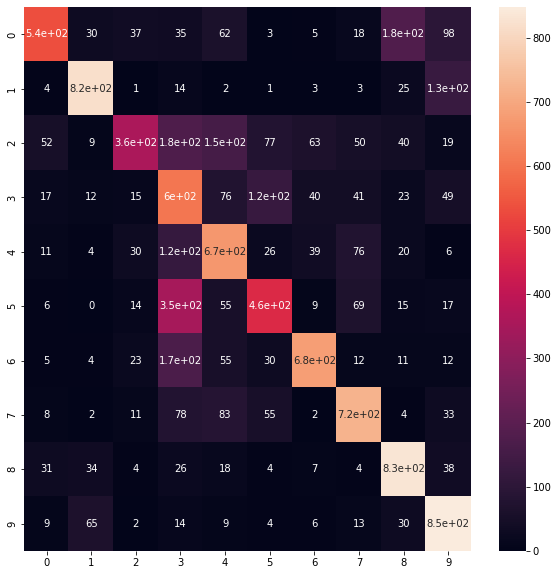

In [ ]:
# seaborn visualization
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot = True)